
Arquivos disponíveis:
1. ABEV3.SA_20250330_indicadores.csv
2. BEEF3.SA_20250330_indicadores.csv
3. BRFS3.SA_20250330_indicadores.csv
4. COGN3.SA_20250330_indicadores.csv
5. CYRE3.SA_20250330_indicadores.csv
6. EGIE3.SA_20250330_indicadores.csv
7. ITUB4.SA_20250330_indicadores.csv
8. JBSS3.SA_20250330_indicadores.csv
9. MRFG3.SA_20250330_indicadores.csv
10. PETR4.SA_20250330_indicadores.csv
11. SLCE3.SA_20250330_indicadores.csv
12. SUZB3.SA_20250330_indicadores.csv
13. VALE3.SA_20250330_indicadores.csv
14. WEGE3.SA_20250330_indicadores.csv
15. ^BVSP_20250330_indicadores.csv



Digite o número do arquivo que deseja visualizar:  14


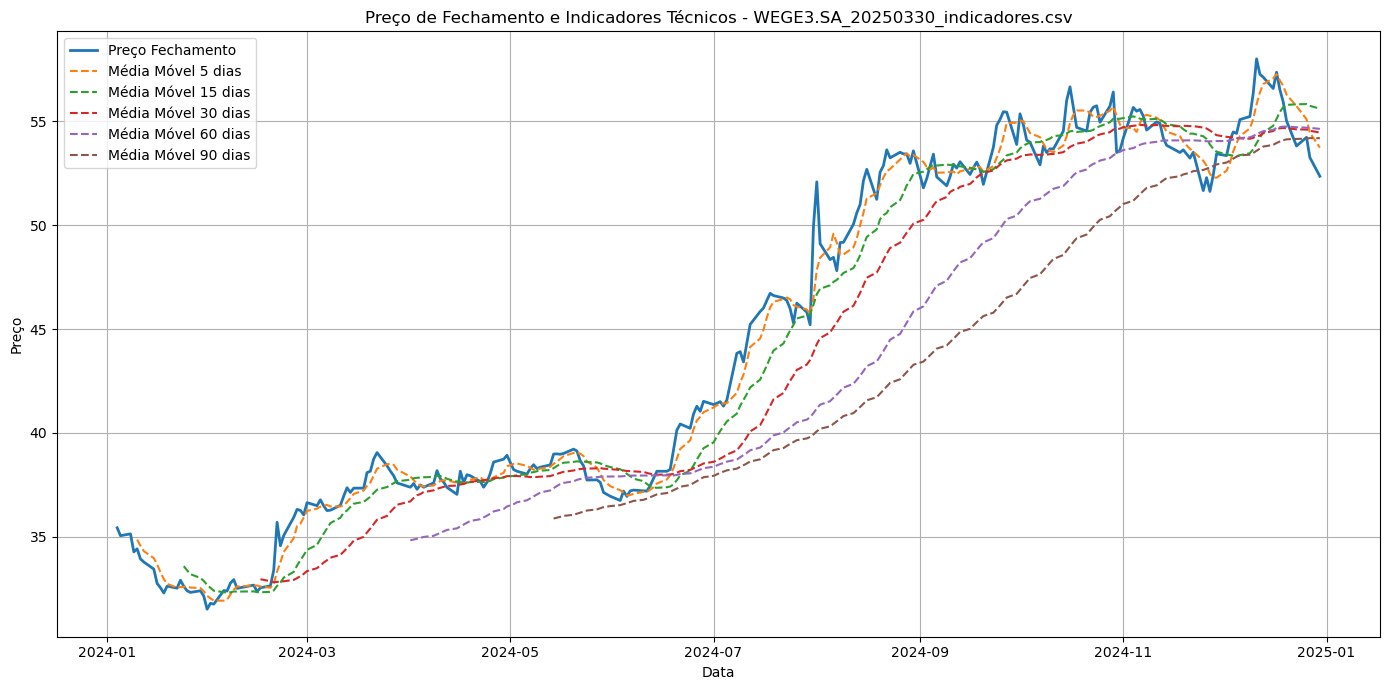

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def listar_arquivos_indicadores():
    caminho_indicadores = "dados/indicadores"
    os.makedirs(caminho_indicadores, exist_ok=True)
    
    arquivos_csv = [
        f for f in os.listdir(caminho_indicadores)
        if f.endswith(".csv")
    ]
    
    if not arquivos_csv:
        print("Nenhum arquivo encontrado em dados/indicadores.")
        return []

    # Exibe os arquivos disponíveis
    print("\nArquivos disponíveis:")
    for i, arq in enumerate(arquivos_csv, start=1):
        print(f"{i}. {arq}")
    
    return arquivos_csv


def plotar_indicadores(nome_arquivo_csv):
    caminho_arquivo = os.path.join("dados", "indicadores", nome_arquivo_csv)

    if not os.path.exists(caminho_arquivo):
        print(f"Arquivo {nome_arquivo_csv} não encontrado.")
        return

    df = pd.read_csv(caminho_arquivo, parse_dates=["Date"])

    colunas_numericas = ["PrecoFechamento", "MediaMovel_5", "MediaMovel_15", 
                         "MediaMovel_30", "MediaMovel_60", "MediaMovel_90"]
    for col in colunas_numericas:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    plt.figure(figsize=(14, 7))
    plt.plot(df["Date"], df["PrecoFechamento"], label="Preço Fechamento", linewidth=2)

    for periodo in [5, 15, 30, 60, 90]:
        col = f"MediaMovel_{periodo}"
        if col in df.columns:
            plt.plot(df["Date"], df[col], label=f"Média Móvel {periodo} dias", linestyle='--')

    plt.title(f"Preço de Fechamento e Indicadores Técnicos - {nome_arquivo_csv}")
    plt.xlabel("Data")
    plt.ylabel("Preço")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def menu_dinamico_plotagem():
    arquivos_csv = listar_arquivos_indicadores()
    
    if not arquivos_csv:
        return

    try:
        escolha = int(input("\nDigite o número do arquivo que deseja visualizar: "))
        if 1 <= escolha <= len(arquivos_csv):
            arquivo_escolhido = arquivos_csv[escolha - 1]
            plotar_indicadores(arquivo_escolhido)
        else:
            print("Opção inválida.")
    except ValueError:
        print("Entrada inválida. Digite apenas números.")


if __name__ == "__main__":
    menu_dinamico_plotagem()
